 <h1><span style="color:crimson;">Problem Statement :-</span></h1>

<h3><span style="color:purple;">Dream Housing Finance company deals in all home loans. They have presence across urban, semi-urban and rural areas. Customer first applies for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process based on customer detail provided while filling the online application form. These details are Gender, Maritial Status, Education, Number of Dependents, Income,Loan Amount, Credit History and others. To automate this process they have given a problem to identify the customer segments, those are eligible for loan amount so that they can specifically target these customers.</span></h3>

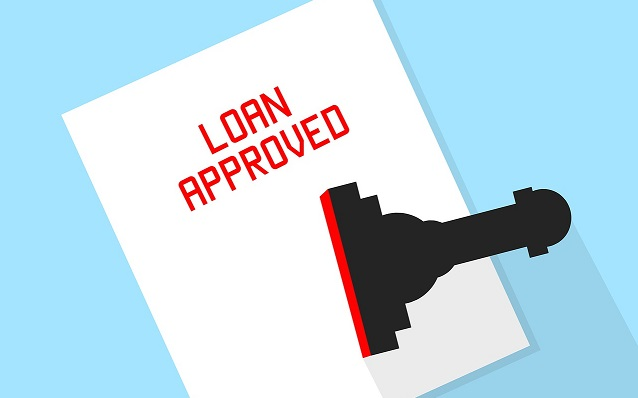

<h3><span style="color:green;">It is a classification problem where we have to predict whether the loan would be approved or not, in a classification problem we have to predict discrete values based on given set of independant variable(s). Classification can be of two types :-</span></h3>

1. BINARY CLASSIFICATION :-
    In this classification we have to predict either of the two classes. For example, classifying the gender as male or female, predicting the result as win or loss.

2. MULTICLASS CLASSIFICATION :- 
    In this classification we classify the data into three or more classes. For example classifying the movie's genre as comedy,action or romance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

In [5]:
# We have 12 independent variables and 1 target variable Loan_Status.
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
#Object represents categorical data, int64 represents a numerical value, float64 represents a
#decimal with a numerical value
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape

(614, 13)

In [9]:
test.shape

(367, 12)

In [10]:
# Frequency Table of a variable will give us the count of each category in that vairable.
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

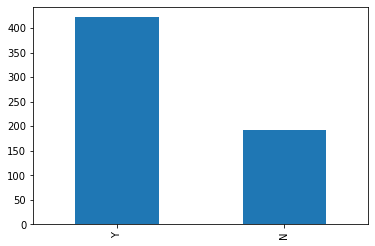

In [12]:
# Loan of 422 out of 614 was approved
train['Loan_Status'].value_counts().plot.bar()

# Univariate Analysis

## Independant Variable Categorical :-
### (Gender, Married,Self_Employed,Credit_History,Loan_Status)

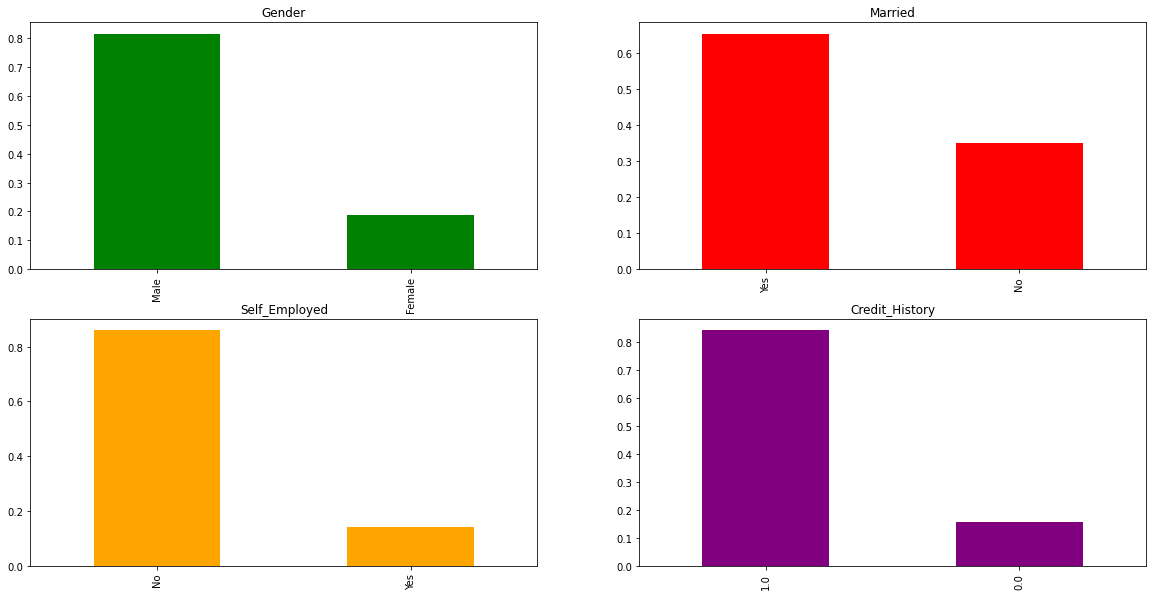

In [13]:
# 80 percent applicants are male
# 65% applicants are married
# 15% are self employed
# 85% have repaid their debts
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender',color='green')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married',color='red')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed',color='orange')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History',color='purple')
plt.show()

## Independant Variable Ordinal :-

### (Dependents,Education,Property_Area)

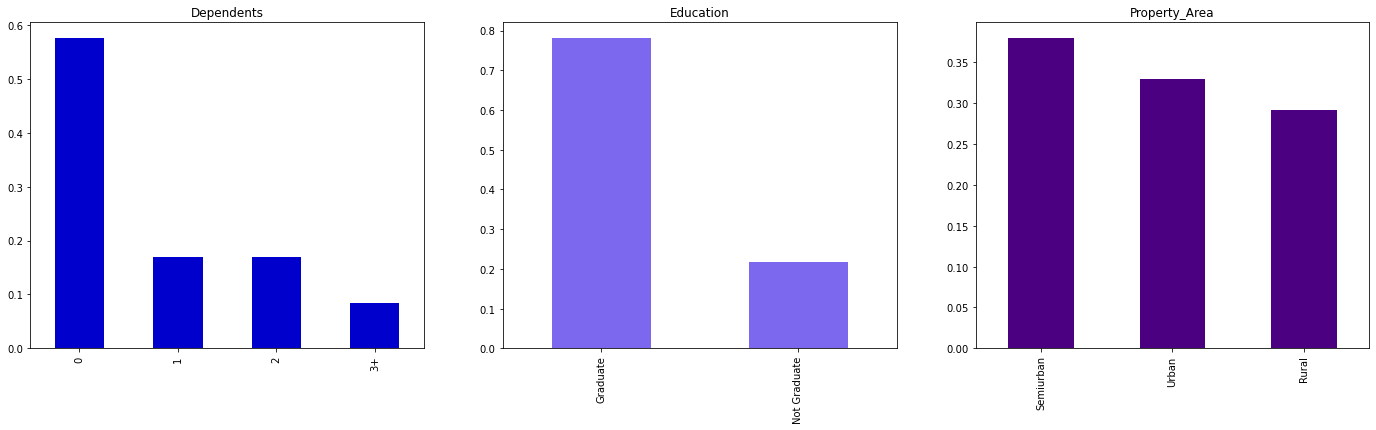

In [14]:
# Most of the applicants don't have any dependents
# 80% of the applicants are graduate
# Most of the applicants are from semi-urban area
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents',color='mediumblue')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education',color='mediumslateblue')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area',color='indigo')
plt.show()

## Independent Variable(Numerical) :-

### (Applicant Income,coapplicant income)

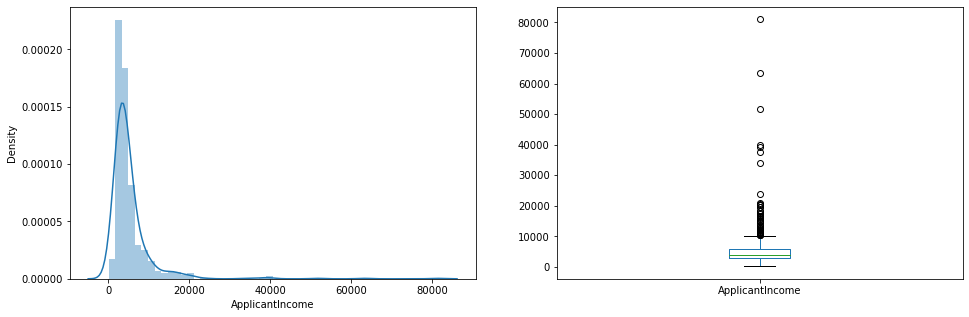

In [15]:
# Data is ditributed towards the left, which means that it is not normally distributed
# The boxplot confirms lots of outliers due to income disparity.
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [16]:
# Segregation by Education

Text(0.5, 1.0, '')

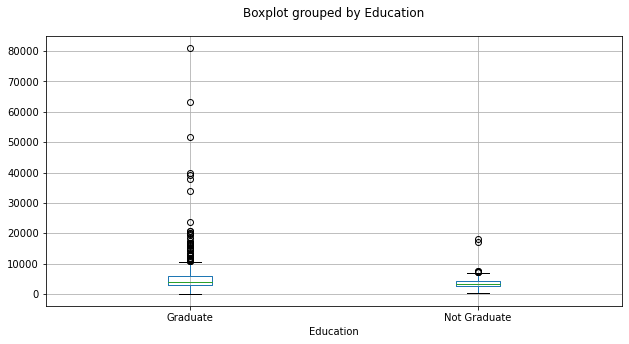

In [17]:
# Higher number of graduates with very high income that appear as outliers
train.boxplot(column='ApplicantIncome',by='Education',figsize=(10,5))
plt.title("")

In [18]:
# Coapplicant Income Distribution

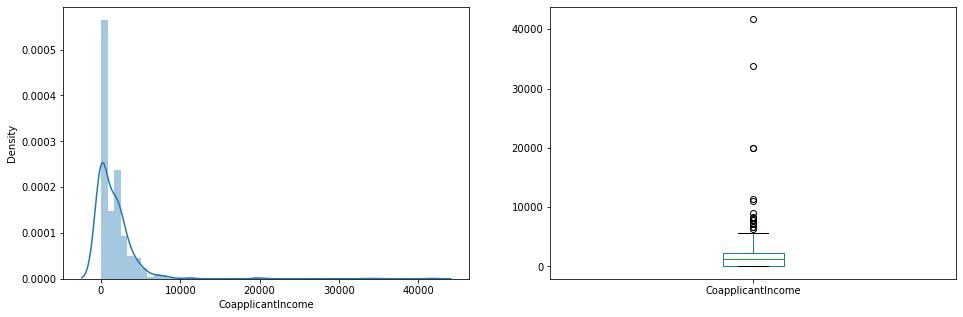

In [19]:
# Majority of coapplicant income ranges from 0 to 5000, this is not distributed normally
# We see a lot of outliers in the co-applicant income.
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [20]:
# Loan Amount Variable

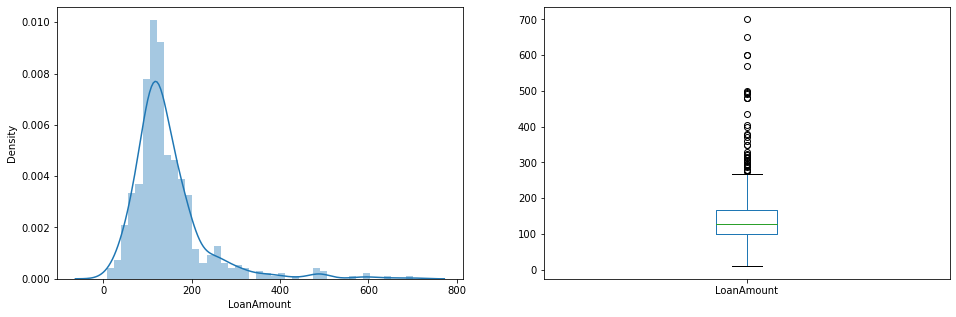

In [21]:
# Distribution is fairly normal.
# There are lot of outliers.
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# Bi-Variate Analysis

## Categorical independent variable vs target variable

<AxesSubplot:xlabel='Gender'>

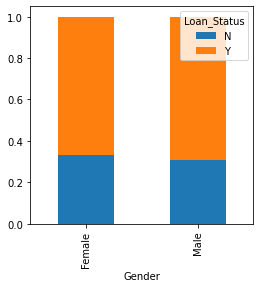

In [22]:
# It can be inferred that proportion of male and female applicants for loan_status is more or less the same 
# for both approved and unapproved loans.
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

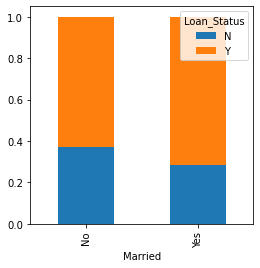

In [23]:
# proportion of married applicants is higher for loan approval
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

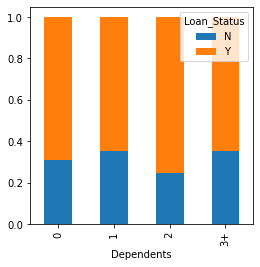

In [24]:
# Distribution of applicants with 1 or 3+ dependants is similar over loan_status.
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

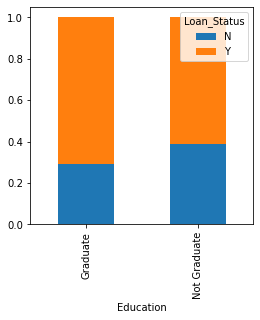

In [25]:
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

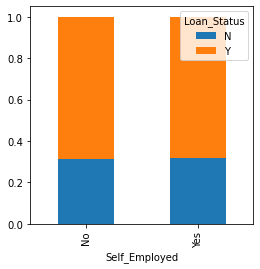

In [26]:
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

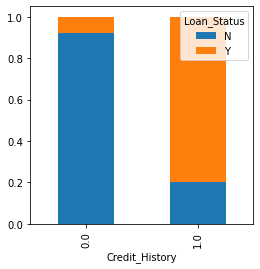

In [27]:
# People with credit history as 1 are more likely to get their loan approved
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

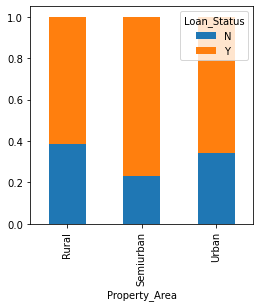

In [28]:
# Proportions of getting loan approved in semi urban areas is higher than urban and rural areas.
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

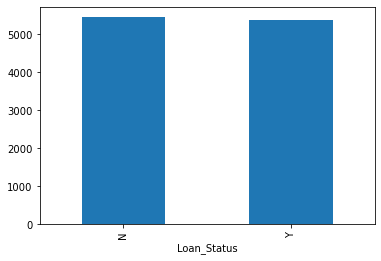

In [29]:
# Mean income of people for which the loan has been approved vs not approved.
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [30]:
bins = [0,2500,4000,6000,8000]
group = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)

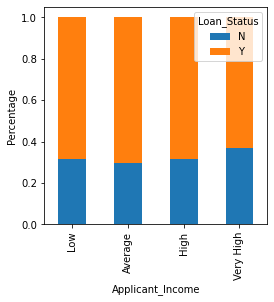

In [31]:
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Applicant_Income')
plt.ylabel('Percentage')
plt.show()

# Applicant Income does not affect the chances of loan approval which contradicts our hypothesis.

In [32]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

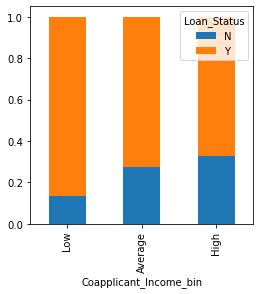

In [33]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

# Loan Approval is not dependent on coapplicant income

In [34]:
# Let us combine applicant income and coapplicant income in total income and see the dsired result over loan
# status

In [35]:
train['TotalIncome'] = train['ApplicantIncome']+train['CoapplicantIncome']

In [36]:
bins =[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['TotalIncome'],bins,labels=group)

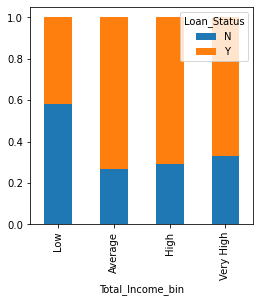

In [37]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

# Proportions of people getting loan approved for low income are low as compared to average, high and very high.

In [38]:
bins =[0,100,200,700] 
group =['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

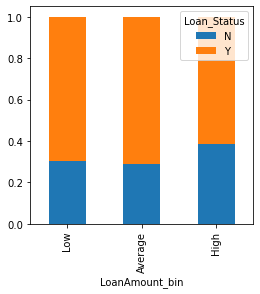

In [39]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

# It seems that proportion for low and average loans is higher as compared to high loan amount, which proves our 
# hypothesis.

In [40]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','TotalIncome'],axis=1)

In [41]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

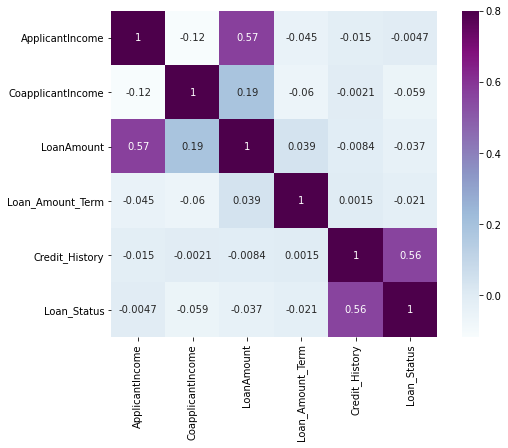

In [42]:
# Heatmaps visualize data through variations in coloring
matrix = train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu",annot=True);

# Most correlated variables are credit_history and loan_status, applicant_income and loan_amount, 
# loanamount is also correlated with CoApplicantIncome

<h1><span style='color:crimson';>Missing Values :-</span></h1>

In [43]:
train.isnull().sum()

# There are missing values in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**For numerical variables** :- imputation using mean or median

**For categorical variables** :- imputation using mode

In [44]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [45]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [47]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [48]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [49]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [50]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<h1><span style="color:crimson;">Outlier Treatment :-</span></h1>

Our data is centered over the left, this is called right skewness. One effective way to remove this is log transformation.

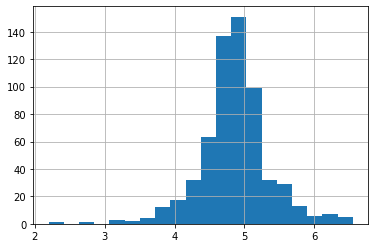

In [51]:
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

<h1><span style="color:crimson;">Evaluation Metrics for Classification Problem :- </span></h1>

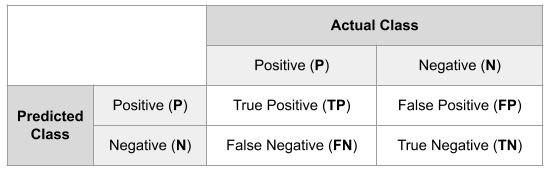

## Confusion Matrix :-

Calculate the distance between predicted values and actual values.

**True Positive :-** Targets which are actually true and we have predicted them true.

**True Negative :-** Targets which are actually false and we have predicted them false.

**False Positive :-** Targets which are actually false and we have predicted them true.

**False Negative :-** Targets which are actually true and we have predicted them false.

<h1><span style="color:crimson";>Logistic Regression :-</span></h1>

<h3><span style="color:purple;">Logistic Regression is a classification algorithm.
    
It is used to predict a binary outcome (1/0,yes/no,true/false)
    
It is an estimation of logit function. Logit function is simply a log of odds in the favour of event.
    
This function creates s-shaped curve with probability estimate, which is very similar to the required stepwise function.</span></h3>

In [52]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

<h1><span style="color:crimson;">Scikit-Learn :-</span></h1>

<h3><span style="color:purple;">Sklearn is used for making different models.It is an open-source library for Python.It is one of the most efficient 
    tools which contains many inbuilt functions that can be used for modelling in Python.</span></h3>

In [53]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

**Dummy variables turn categorical variables into 0 or 1, making them lot easier to quantify and compare.**

1.Consider the gender variable.It has 2 classes Male or Female.

2.As Logistic Regression takes only the numerical values as input we have to convert male and female into numerical
value.

3.Once we apply dummy to this variable, it will convert the Gender variable into two variables (Gender_Male and Gender_Female.)

4.Gender_Male will have a value of 0 if the gender is female and 1 if the gender is male.

In [54]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3)

# The data has been divided into training and validation part.

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [58]:
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='l2',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [59]:
# Here C parameter represents inverse of regularisation strength. Regularisation is applying a penalty to 
#increasing the magnitude of parameter values in order to reduce over-fitting. Smaller values of C specify
# stronger regularisation.

In [60]:
pred_cv = model.predict(x_cv)

In [61]:
accuracy_score(y_cv,pred_cv) # 76% accurate

0.7891891891891892

In [62]:
pred_test = model.predict(test)

In [63]:
submission = pd.read_csv('sample_submission.csv')

In [65]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test

In [67]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [68]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')